In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!source /content/drive/MyDrive/colab_env/bin/activate

import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

In [10]:
import os
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
from matplotlib.font_manager import fontManager
from gensim.models import Word2Vec, KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
os.chdir('/content')

In [20]:
%config InlineBackend.figure_format = 'retina'

In [17]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-12-14 08:21:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n7ms87jlonhgu6qoapusuetul0p3ijnu/1702542075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=04136a02-8dda-44c3-8431-ac57c05e58f6 [following]
--2023-12-14 08:21:30--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n7ms87jlonhgu6qoapusuetul0p3ijnu/1702542075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=04136a02-8dda-44c3-8431-ac57c05e58f6
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.0.65, 2607:f8b0:4025:810::2001
Connecting to doc-0k-9o-docs.goog

In [18]:
plt.style.use('seaborn')
fontManager.addfont('/content/TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family = 'Taipei Sans TC Beta')

<ipython-input-18-b3073de787f3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
os.chdir('/content/drive/MyDrive/Capstone/Spacy/word2vec')

In [6]:
model = KeyedVectors.load("w2v_chat_news.model")

In [ ]:
cheer_words = ['加油', '恭喜', '最棒', '穩住', '撐住', '一鼓作氣', '棒棒', '衝啊', '再接再厲', '追分', '沒事', '保持', '穩穩', '咬住', '穩贏', 'GOGOGO', '無敵', '777', '666', '緊張', '刺激', '精彩', '好球', 'OMG', '厲害', '很棒', '哈哈', 'ha', 'HA', 'Ha', '激動', '狂', '神', '太強', '帥', '送啦', '好看', '讚', '好猛', '可惜', '耶', '超鬼', 'lucky', 'Lucky', 'Wow', 'wow', 'WOW', 'yey', 'yes', 'YEY', 'Yey', 'Yes', 'YES', '+u', '贏球', '水喔', '氣勢', '猛', '感動', '贏']
tactic_words = ['攔網', '快攻', '進攻', '后排', '後排', '前排', '發球', '攻擊', '防守', '接發', '救', '接球', '到位', '接發球', '發球', '攔', '舉球', '一傳', '角度', '主攻', '二傳', '輪轉', 'block', 'IN', 'in', 'In', '界內', '封網', '失誤', '觸球', '暫停', '換人', '落地', '得分', '舉', '界外', 'outside', '局末', 'ACE', 'deuce', 'ace', 'Deuce', 'deu', '吊球', '短球', 'touch', '平手', '觸網', '自由', '連擊', '欄網']
coach_words = ['連董', '小牛', '鄧公', '教練', '教练', '大康']
stream_words = ['導播', '小編', '球評', '轉播', '講評', '聊天室', '畫面', '直播', '致平', '畫質', '邱老師', '電視', '邱老师', '000人', '000 人', '000', '千人', 'HOP SPORTS', '鏡頭', '攝影機', 'HOP Sports', '看球', '人數', '視角', '重播', '運鏡', '鏡位', '延遲', '祐哥']
judge_words = ['裁判', '誤判', '挑戰', '規則', '主播', '吹', '鷹眼', '黃牌', '抗議', '判']

In [ ]:
topic_list = {
    "教練": coach_words,
    "加油": cheer_words,
    "戰術": tactic_words,
    "轉播": stream_words,
    "裁判": judge_words
}

In [ ]:
topic_word = '教練'

filtered_word_lists = [word for word in topic_list[topic_word] if word in model.wv]
similarities = {word: model.wv.similarity(topic_word, word) for word in filtered_word_lists}
sorted_similarities = sorted(similarities.items(), key = lambda x: x[1], reverse = True)

print(f'The similarity between Topic: {topic_word}')
for word, similarity in sorted_similarities:
    print(f'{word}: {similarity}')

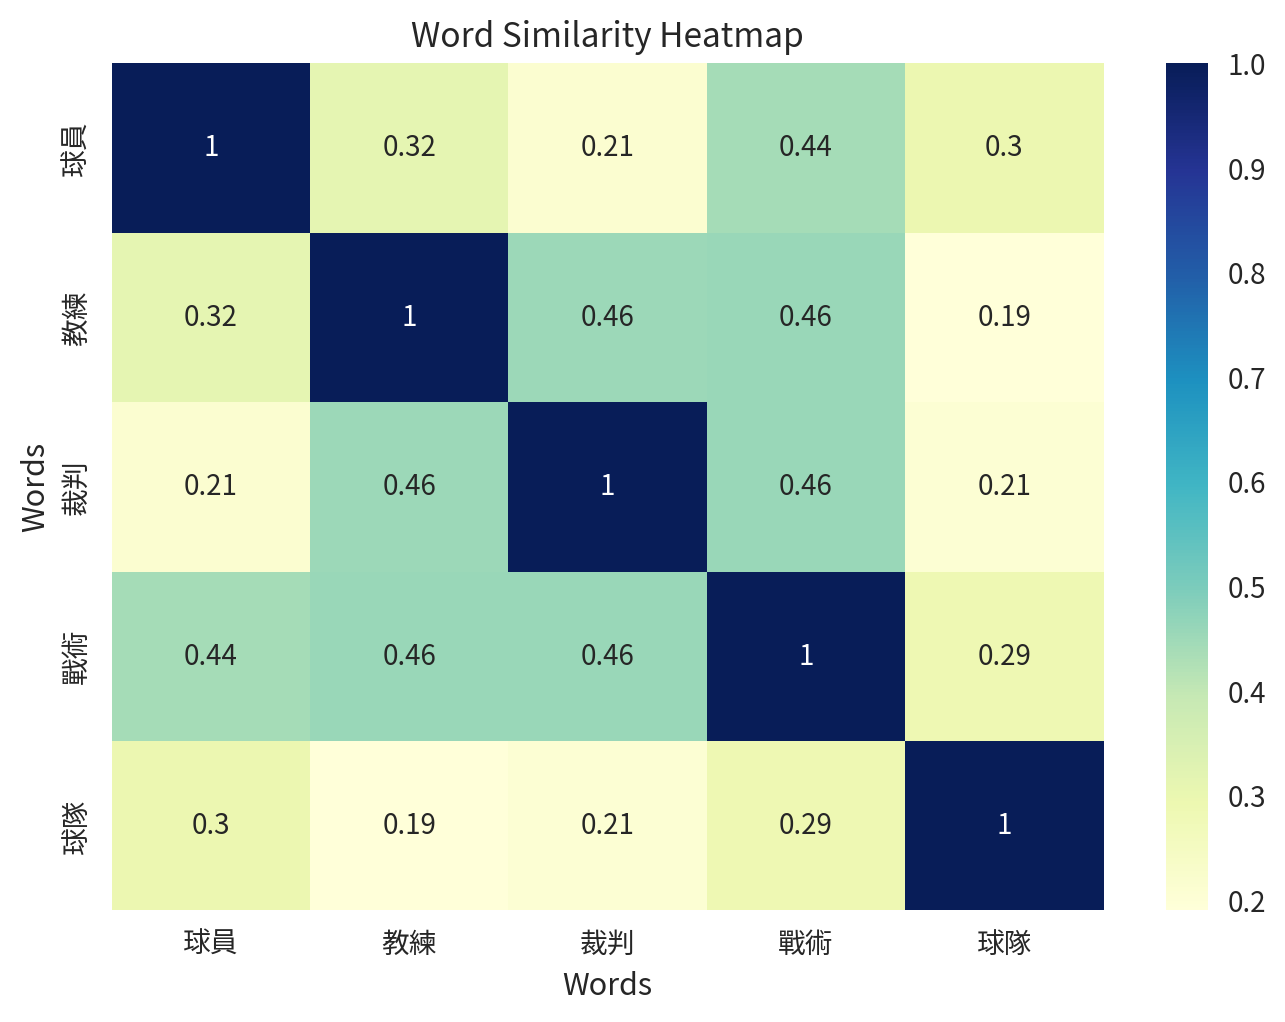

In [22]:
# topic_list = ['比賽', '加油', '轉播', '聊天']
topic_list = ['球員', '教練', '裁判', '戰術', '球隊']
word_vectors = [model.wv[word] for word in topic_list]
similarity_matrix = cosine_similarity(word_vectors)

# for i in range(len(topic_list)):
#     for j in range(len(topic_list)):
#         print(f"Similarity between {topic_list[i]} and {topic_list[j]}: {similarity_matrix[i][j]}")

sns.heatmap(similarity_matrix, annot = True, xticklabels = topic_list, yticklabels = topic_list, cmap = "YlGnBu")

plt.xlabel("Words")
plt.ylabel("Words")
plt.title("Word Similarity Heatmap")

# Show the plot
plt.show()

### Overall Embedding Space

In [ ]:
word_lists = []
word_lists.extend(cheer_words)
word_lists.extend(tactic_words)
word_lists.extend(coach_words)
word_lists.extend(stream_words)
word_lists.extend(judge_words)

In [ ]:
filtered_word_lists = [word for word in word_lists if word in model.wv]

<ipython-input-98-8ae120d1841b>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1300x700 with 0 Axes>

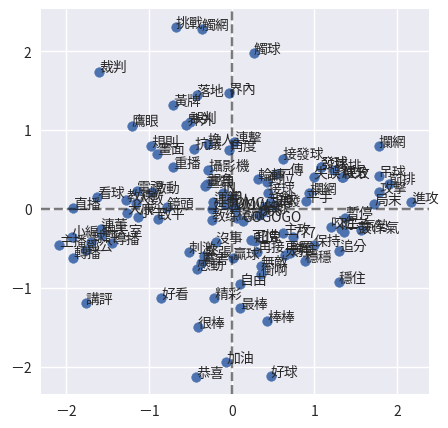

In [ ]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.style.use('seaborn')
fontManager.addfont('/content/TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family = 'Taipei Sans TC Beta')

plt.figure(figsize = (13, 7))

vec = model.wv[filtered_word_lists]
pca = PCA(n_components = 2)
emb = pca.fit_transform(vec)
word = filtered_word_lists

plt.figure(figsize=(5,5))
plt.scatter(emb[:,0], emb[:,1])
for idx,row in enumerate(emb):
    plt.text(row[0], row[1], str(word[idx]))
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

# for word_list, color in zip(filtered_word_lists, colors):
#     vec = model.wv[word_list]
#     pca_vec = PCA(n_components=2).fit_transform(vec)
#     plt.scatter(pca_vec[:, 0], pca_vec[:, 1], linewidths=10, color=color)

#     for j, w in enumerate(word_list):
#         plt.annotate(w, xy = (pca_vec[j, 0], pca_vec[j, 1]), color = color)

# plt.xlabel("PC1", size=15)
# plt.ylabel("PC2", size=15)
# plt.title("Word Embedding Space", size=20)


# plt.show()